<a href="https://colab.research.google.com/github/xcarslan/cerenonetelent23/blob/main/VeriOnisleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bu satırlar gerekli kütüphaneleri içe aktarır.


In [ ]:
import os
import random
from PIL import Image
import numpy as np


In [ ]:
klasor_yollari = [
    '/content/drive/MyDrive/Multiple Sclerosis/Control-Axial',
    '/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal',
    '/content/drive/MyDrive/Multiple Sclerosis/MS-Axial',
    '/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal'
]


In [ ]:


veri_setleri = {}

for klasor_yolu in klasor_yollari:
    dosyalar = [dosya for dosya in os.listdir(klasor_yolu) if dosya.endswith('.png')]
    secilen_dosyalar = random.sample(dosyalar, 500)
    veri_setleri[klasor_yolu] = [np.array(Image.open(os.path.join(klasor_yolu, dosya))) for dosya in secilen_dosyalar]

In [ ]:
for anahtar in veri_setleri.keys():
    print(anahtar)

/content/drive/MyDrive/Multiple Sclerosis/Control-Axial
/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal
/content/drive/MyDrive/Multiple Sclerosis/MS-Axial
/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal


In [ ]:
for klasor in veri_setleri:
    for i, goruntu in enumerate(veri_setleri[klasor]):
        # Normalizasyon
        goruntu = goruntu / 255.0
        veri_setleri[klasor][i] = goruntu

In [ ]:
from skimage.transform import resize

for klasor in veri_setleri:
    for i, goruntu in enumerate(veri_setleri[klasor]):
        # Görüntüyü yeniden boyutlandırma
        goruntu = resize(goruntu, (128, 128))
        veri_setleri[klasor][i] = goruntu

In [ ]:
def kontrol_et_ve_yukle(dosya_yolu):
    try:
        goruntu = Image.open(dosya_yolu)
        goruntu.verify()  # Görüntü dosyasının bozuk olup olmadığını kontrol eder.
        return np.array(goruntu)
    except (IOError, SyntaxError):
        print(f"Bozuk dosya: {dosya_yolu}")
        return None

In [ ]:
from scipy.ndimage import gaussian_filter

def gurultu_azalt(goruntu):
    return gaussian_filter(goruntu, sigma=1)

In [ ]:
def segmentasyon_yap(goruntu):
    eşik_değeri = 127
    _, segmentasyon = cv2.threshold(goruntu, eşik_değeri, 255, cv2.THRESH_BINARY)
    return segmentasyon

In [ ]:
for klasor in veri_setleri:
    print(f"{klasor}: {len(veri_setleri[klasor])} görüntü")

/content/drive/MyDrive/Multiple Sclerosis/Control-Axial: 500 görüntü
/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal: 500 görüntü
/content/drive/MyDrive/Multiple Sclerosis/MS-Axial: 500 görüntü
/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal: 500 görüntü


In [ ]:
tum_goruntuler = []
tum_etiketler = []

for klasor in veri_setleri:
    # Klasör adını etiket olarak kullanıyoruz
    etiket = klasor.split('/')[-1]
    for goruntu in veri_setleri[klasor]:
        tum_goruntuler.append(goruntu)
        tum_etiketler.append(etiket)


In [ ]:
from sklearn.model_selection import train_test_split

# İlk olarak, verileri eğitim ve kalan (doğrulama + test) seti olarak ayırıyoruz
X_train, X_temp, y_train, y_temp = train_test_split(tum_goruntuler, tum_etiketler, test_size=0.4, random_state=42)

# Kalan verileri doğrulama ve test setlerine ayırıyoruz
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

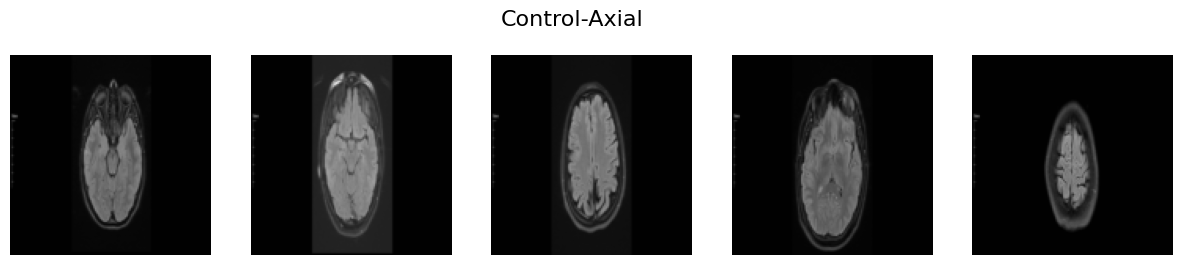

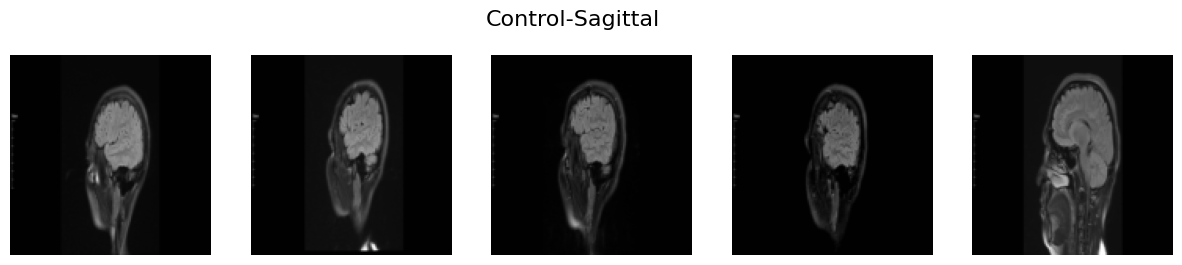

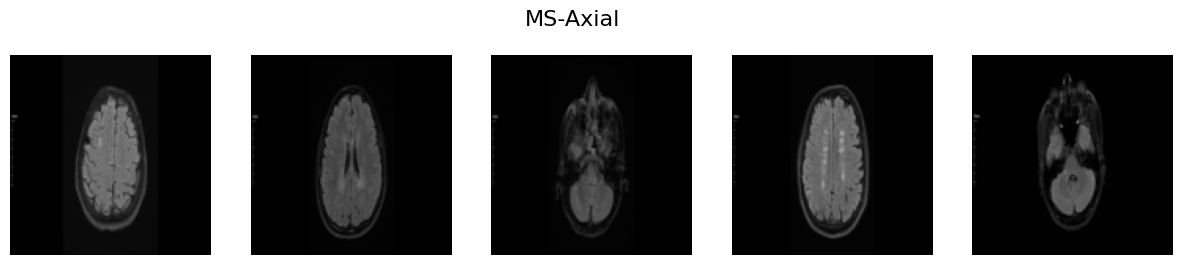

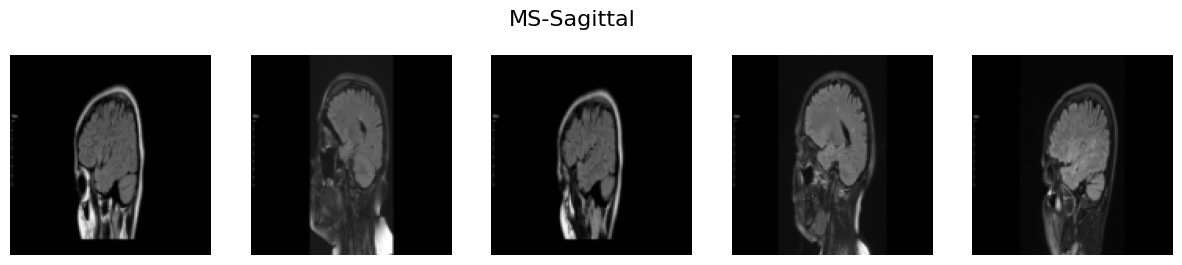

In [ ]:
import matplotlib.pyplot as plt
import random

# Her bir klasör için beş görüntüyü görselleştirme
num_samples_per_class = 5  # Her klasörden görselleştirilecek örnek sayısı

# Control-Axial için
secilen_ornekler = random.sample(veri_setleri['/content/drive/MyDrive/Multiple Sclerosis/Control-Axial'], num_samples_per_class)
plt.figure(figsize=(15, 3))
plt.suptitle('Control-Axial', fontsize=16)
for i, ornek in enumerate(secilen_ornekler):
    plt.subplot(1, num_samples_per_class, i + 1)
    plt.imshow(ornek, cmap='gray')
    plt.axis('off')
plt.show()

# Control-Sagittal için
secilen_ornekler = random.sample(veri_setleri['/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal'], num_samples_per_class)
plt.figure(figsize=(15, 3))
plt.suptitle('Control-Sagittal', fontsize=16)
for i, ornek in enumerate(secilen_ornekler):
    plt.subplot(1, num_samples_per_class, i + 1)
    plt.imshow(ornek, cmap='gray')
    plt.axis('off')
plt.show()

# MS-Axial için
secilen_ornekler = random.sample(veri_setleri['/content/drive/MyDrive/Multiple Sclerosis/MS-Axial'], num_samples_per_class)
plt.figure(figsize=(15, 3))
plt.suptitle('MS-Axial', fontsize=16)
for i, ornek in enumerate(secilen_ornekler):
    plt.subplot(1, num_samples_per_class, i + 1)
    plt.imshow(ornek, cmap='gray')
    plt.axis('off')
plt.show()

# MS-Sagittal için
secilen_ornekler = random.sample(veri_setleri['/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal'], num_samples_per_class)
plt.figure(figsize=(15, 3))
plt.suptitle('MS-Sagittal', fontsize=16)
for i, ornek in enumerate(secilen_ornekler):
    plt.subplot(1, num_samples_per_class, i + 1)
    plt.imshow(ornek, cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
print("Eğitim seti boyutu:", len(X_train))
print("Doğrulama seti boyutu:", len(X_val))
print("Test seti boyutu:", len(X_test))

Eğitim seti boyutu: 1200
Doğrulama seti boyutu: 400
Test seti boyutu: 400


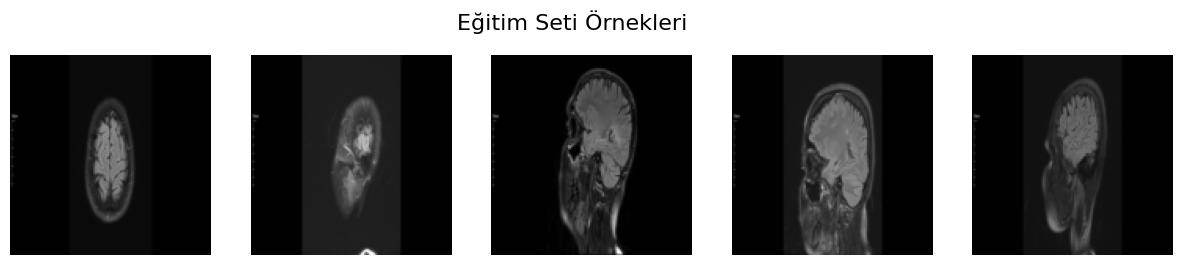

In [ ]:
import matplotlib.pyplot as plt
import random

def goruntuleri_goster(goruntuler, baslik, num_samples=5):
    secilen_ornekler = random.sample(goruntuler, num_samples)
    plt.figure(figsize=(15, 3))
    plt.suptitle(baslik, fontsize=16)
    for i, ornek in enumerate(secilen_ornekler):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(ornek, cmap='gray')
        plt.axis('off')
    plt.show()

# Eğitim setinden örnekleri görselleştirme
goruntuleri_goster(X_train, 'Eğitim Seti Örnekleri')

# Doğrulama ve test setlerinden de benzer şekilde örnekleri görselleştirebilirsiniz.


In [19]:
# Eğitim setindeki ilk 5 görüntü ve etiketi göster
for i in range(5):
    print(f"Eğitim Görüntü {i+1}: ", X_train[i])
    print(f"Eğitim Etiketi {i+1}: ", y_train[i])

Eğitim Görüntü 1:  [[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 ...

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]]
Eğitim Etiketi 1:  Control-Sagittal
Eğitim Görüntü 2:  [[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  

In [20]:
# Doğrulama setindeki ilk 5 görüntü ve etiketi göster
for i in range(5):
    print(f"Doğrulama Görüntü {i+1}: ", X_val[i])
    print(f"Doğrulama Etiketi {i+1}: ", y_val[i])

Doğrulama Görüntü 1:  [[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 ...

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]]
Doğrulama Etiketi 1:  Control-Sagittal
Doğrulama Görüntü 2:  [[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 

In [21]:
# Test setindeki ilk 5 görüntü ve etiketi göster
for i in range(5):
    print(f"Test Görüntü {i+1}: ", X_test[i])
    print(f"Test Etiketi {i+1}: ", y_test[i])

Test Görüntü 1:  [[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 ...

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]]
Test Etiketi 1:  Control-Axial
Test Görüntü 2:  [[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0.

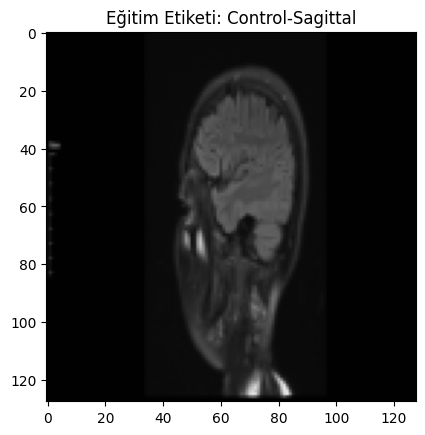

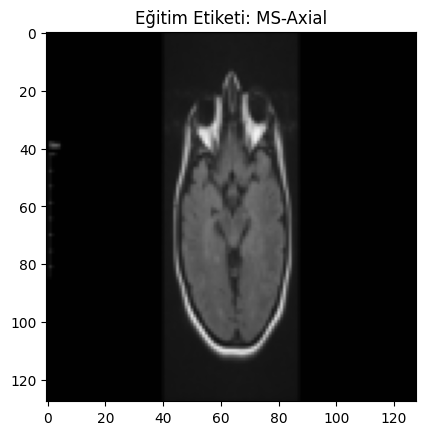

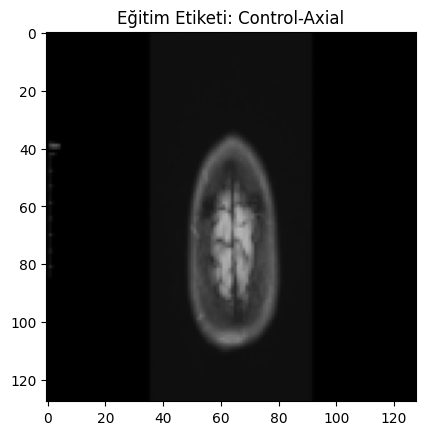

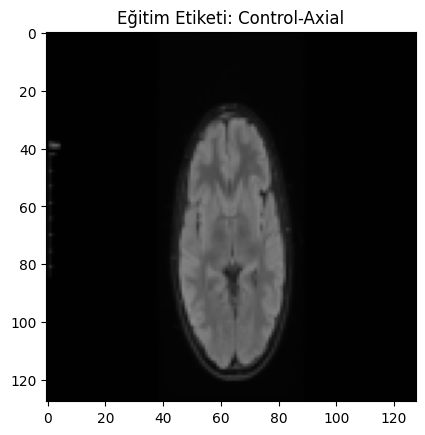

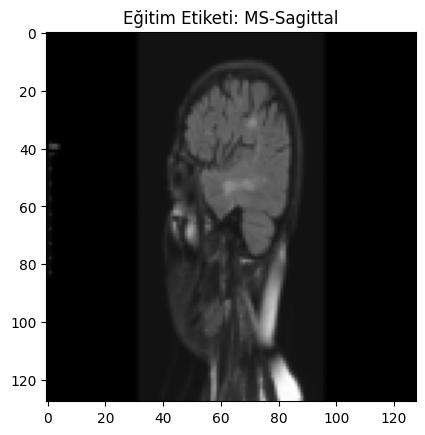

In [22]:
# @title
import matplotlib.pyplot as plt

# Eğitim setindeki ilk 5 görüntüyü görselleştir
for i in range(5):
    plt.imshow(X_train[i], cmap='gray')  # Görüntüler gri tonlamalıysa cmap='gray' kullanın
    plt.title(f"Eğitim Etiketi: {y_train[i]}")
    plt.show()

In [24]:
import os

# Hedef klasör yolları
train_dir = '/content/drive/MyDrive/Multiple Sclerosis/Train'
val_dir = '/content/drive/MyDrive/Multiple Sclerosis/Validation'
test_dir = '/content/drive/MyDrive/Multiple Sclerosis/Test'

# Klasörleri oluştur
for dir in [train_dir, val_dir, test_dir]:
    if not os.path.exists(dir):
        os.makedirs(dir)

In [26]:
from PIL import Image
import numpy as np

def goruntuleri_kaydet(goruntuler, etiketler, hedef_klasor):
    dosya_yollari = []
    for i, (goruntu, etiket) in enumerate(zip(goruntuler, etiketler)):
        # Görüntüyü PIL Image formatına dönüştür
        goruntu = Image.fromarray((goruntu * 255).astype(np.uint8))
        dosya_adi = f"{etiket}_{i}.png"
        dosya_yolu = os.path.join(hedef_klasor, etiket, dosya_adi)
        os.makedirs(os.path.dirname(dosya_yolu), exist_ok=True)
        goruntu.save(dosya_yolu)
        dosya_yollari.append(dosya_yolu)
    return dosya_yollari

# Görüntüleri kaydet ve dosya yollarını al
train_paths = goruntuleri_kaydet(X_train, y_train, train_dir)
val_paths = goruntuleri_kaydet(X_val, y_val, val_dir)
test_paths = goruntuleri_kaydet(X_test, y_test, test_dir)

In [27]:
def dosyalari_kopyala(dosya_yollari, hedef_klasor):
    for dosya_yolu in dosya_yollari:
        hedef_dosya_yolu = os.path.join(hedef_klasor, os.path.basename(dosya_yolu))
        shutil.copy(dosya_yolu, hedef_dosya_yolu)

# Dosyaları ilgili klasörlere kopyala
dosyalari_kopyala(train_paths, train_dir)
dosyalari_kopyala(val_paths, val_dir)
dosyalari_kopyala(test_paths, test_dir)

In [28]:
for dir in [train_dir, val_dir, test_dir]:
    print(f"Klasör: {dir}")
    print("İçindekiler:", os.listdir(dir))
    print()

Klasör: /content/drive/MyDrive/Multiple Sclerosis/Train
İçindekiler: ['Control-Sagittal', 'MS-Axial', 'Control-Axial', 'MS-Sagittal', 'Control-Sagittal_0.png', 'MS-Axial_1.png', 'Control-Axial_2.png', 'Control-Axial_3.png', 'MS-Sagittal_4.png', 'Control-Sagittal_5.png', 'Control-Axial_6.png', 'MS-Sagittal_7.png', 'Control-Sagittal_8.png', 'Control-Sagittal_9.png', 'MS-Sagittal_10.png', 'Control-Axial_11.png', 'MS-Axial_12.png', 'Control-Axial_13.png', 'MS-Sagittal_14.png', 'MS-Axial_15.png', 'MS-Sagittal_16.png', 'MS-Sagittal_17.png', 'MS-Axial_18.png', 'MS-Axial_19.png', 'MS-Sagittal_20.png', 'Control-Sagittal_21.png', 'MS-Sagittal_22.png', 'Control-Sagittal_23.png', 'Control-Sagittal_24.png', 'Control-Axial_25.png', 'MS-Sagittal_26.png', 'MS-Axial_27.png', 'Control-Axial_28.png', 'Control-Sagittal_29.png', 'MS-Axial_30.png', 'Control-Axial_31.png', 'Control-Sagittal_32.png', 'Control-Sagittal_33.png', 'Control-Sagittal_34.png', 'Control-Sagittal_35.png', 'Control-Axial_36.png', 'MS-A